## SMART LOGISTICS SUPPLY CHAIN DATASET

This dataset captures real-time supply chain data gathered from various stages of the logistics process, leveraging Internet of Things (IoT) technologies. It includes information such as transaction IDs, supply chain stages, entities involved, environmental conditions, shipment locations, and delays. The data is designed to assist in predicting delivery statuses, optimizing routes, identifying risk factors, and forecasting potential disruptions. It offers a comprehensive view of the supply chain, enabling businesses to enhance operational efficiency and improve decision-making through predictive analytics.

## Loading Libraries and Dataset

In [174]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\Datascience\Datasets\smart_logistics_dataset.csv")
print(df)

               Timestamp  Asset_ID  Latitude  Longitude  Inventory_Level  \
0    2024-03-20 00:11:14   Truck_7  -65.7383    11.2497              390   
1    2024-10-30 07:53:51   Truck_6   22.2748  -131.7086              491   
2    2024-07-29 18:42:48  Truck_10   54.9232    79.5455              190   
3    2024-10-28 00:50:54   Truck_9   42.3900    -1.4788              330   
4    2024-09-27 15:52:58   Truck_7  -65.8477    47.9468              480   
..                   ...       ...       ...        ...              ...   
995  2024-07-22 16:30:00   Truck_6   89.8701    73.6867              264   
996  2024-04-30 04:58:58   Truck_5  -10.4792  -177.1239              479   
997  2024-10-27 22:09:13   Truck_2  -71.0609    75.3714              347   
998  2024-04-18 23:06:56   Truck_2  -76.7910    18.3631              276   
999  2024-09-18 19:39:24   Truck_8   59.8356  -114.4198              157   

    Shipment_Status  Temperature  Humidity Traffic_Status  Waiting_Time  \
0           

## DATA CLEANING

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   1000 non-null   object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [176]:
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,None,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,None,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,None,71.6,270,1


In [177]:
df.isnull().sum()

Timestamp                  0
Asset_ID                   0
Latitude                   0
Longitude                  0
Inventory_Level            0
Shipment_Status            0
Temperature                0
Humidity                   0
Traffic_Status             0
Waiting_Time               0
User_Transaction_Amount    0
User_Purchase_Frequency    0
Logistics_Delay_Reason     0
Asset_Utilization          0
Demand_Forecast            0
Logistics_Delay            0
dtype: int64

In [178]:
df.columns =  df.columns.str.capitalize()

In [179]:
df = df.apply(lambda x : x.str.lower() if x.dtype == 'object' else x)

In [180]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [181]:
df.duplicated().sum()

0

In [182]:
df.head()

,Timestamp,Asset_id,Latitude,Longitude,Inventory_level,Shipment_status,Temperature,Humidity,Traffic_status,Waiting_time,User_transaction_amount,User_purchase_frequency,Logistics_delay_reason,Asset_utilization,Demand_forecast,Logistics_delay
0,2024-03-20 00:11:14,truck_7,-65.7383,11.2497,390,delayed,27.0,67.8,detour,38,320,4,none,60.1,285,1
1,2024-10-30 07:53:51,truck_6,22.2748,-131.7086,491,in transit,22.5,54.3,heavy,16,439,7,weather,80.9,174,1
2,2024-07-29 18:42:48,truck_10,54.9232,79.5455,190,in transit,25.2,62.2,detour,34,355,3,none,99.2,260,0
3,2024-10-28 00:50:54,truck_9,42.3900,-1.4788,330,delivered,25.4,52.3,heavy,37,227,5,traffic,97.4,160,1
4,2024-09-27 15:52:58,truck_7,-65.8477,47.9468,480,delayed,20.5,57.2,clear,56,197,6,none,71.6,270,1


In [183]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Asset_id                 1000 non-null   object        
 2   Latitude                 1000 non-null   float64       
 3   Longitude                1000 non-null   float64       
 4   Inventory_level          1000 non-null   int64         
 5   Shipment_status          1000 non-null   object        
 6   Temperature              1000 non-null   float64       
 7   Humidity                 1000 non-null   float64       
 8   Traffic_status           1000 non-null   object        
 9   Waiting_time             1000 non-null   int64         
 10  User_transaction_amount  1000 non-null   int64         
 11  User_purchase_frequency  1000 non-null   int64         
 12  Logistics_delay_reason   1000 non-n

Round the decimal values

In [185]:
df = df.round(2)

In [186]:
df.head()

,Timestamp,Asset_id,Latitude,Longitude,Inventory_level,Shipment_status,Temperature,Humidity,Traffic_status,Waiting_time,User_transaction_amount,User_purchase_frequency,Logistics_delay_reason,Asset_utilization,Demand_forecast,Logistics_delay
0,2024-03-20 00:11:14,truck_7,-65.74,11.25,390,delayed,27.0,67.8,detour,38,320,4,none,60.1,285,1
1,2024-10-30 07:53:51,truck_6,22.27,-131.71,491,in transit,22.5,54.3,heavy,16,439,7,weather,80.9,174,1
2,2024-07-29 18:42:48,truck_10,54.92,79.55,190,in transit,25.2,62.2,detour,34,355,3,none,99.2,260,0
3,2024-10-28 00:50:54,truck_9,42.39,-1.48,330,delivered,25.4,52.3,heavy,37,227,5,traffic,97.4,160,1
4,2024-09-27 15:52:58,truck_7,-65.85,47.95,480,delayed,20.5,57.2,clear,56,197,6,none,71.6,270,1


## STATISCTICAL ANALYSIS

In [187]:
df.corr()

C:\Users\aziya\AppData\Local\Temp\ipykernel_7864\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Latitude,Longitude,Inventory_level,Temperature,Humidity,Waiting_time,User_transaction_amount,User_purchase_frequency,Asset_utilization,Demand_forecast,Logistics_delay
Latitude,1.000000,-0.000506,0.014805,-0.018831,-0.030202,-0.025667,-0.035171,0.003925,-0.023605,0.022111,0.039635
Longitude,-0.000506,1.000000,-0.023186,0.007387,0.031622,0.031939,-0.019753,-0.036787,0.002915,0.098411,0.011796
Inventory_level,0.014805,-0.023186,1.000000,-0.021061,0.013395,-0.020337,-0.036785,-0.019701,0.017041,-0.016727,-0.003340
Temperature,-0.018831,0.007387,-0.021061,1.000000,-0.022674,0.017392,-0.006377,-0.017139,0.046005,-0.010425,-0.038067
Humidity,-0.030202,0.031622,0.013395,-0.022674,1.000000,0.029030,-0.034828,0.023341,-0.030637,-0.005887,-0.000504
Waiting_time,-0.025667,0.031939,-0.020337,0.017392,0.029030,1.000000,-0.017796,0.023582,0.018008,-0.030042,-0.063036
User_transaction_amount,-0.035171,-0.019753,-0.036785,-0.006377,-0.034828,-0.017796,1.000000,0.038406,0.038607,0.004531,0.013605
User_purchase_frequency,0.003925,-0.036787,-0.019701,-0.017139,0.023341,0.023582,0.038406,1.000000,0.024445,-0.082900,-0.017439
Asset_utilization,-0.023605,0.002915,0.017041,0.046005,-0.030637,0.018008,0.038607,0.024445,1.000000,-0.077926,-0.003140
Demand_forecast,0.022111,0.098411,-0.016727,-0.010425,-0.005887,-0.030042,0.004531,-0.082900,-0.077926,1.000000,-0.018621


C:\Users\aziya\AppData\Local\Temp\ipykernel_7864\2249596087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

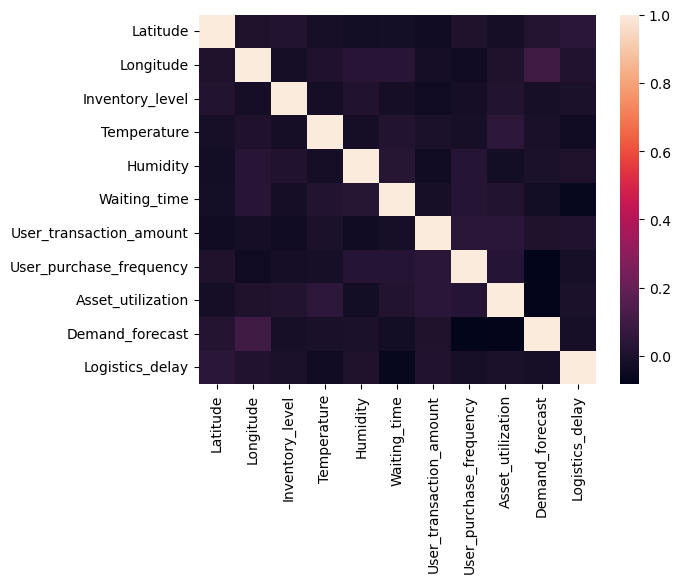

In [188]:
import seaborn as sns
sns.heatmap(df.corr())

In [189]:
df.describe()

,Latitude,Longitude,Inventory_level,Temperature,Humidity,Waiting_time,User_transaction_amount,User_purchase_frequency,Asset_utilization,Demand_forecast,Logistics_delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.360130,0.837060,297.915000,23.893900,65.042200,35.062000,299.055000,5.513000,79.599100,199.284000,0.566000
std,51.997291,104.843664,113.554773,3.322178,8.753765,14.477768,117.787792,2.935379,11.631153,59.920847,0.495873
min,-89.790000,-179.820000,100.000000,18.000000,50.000000,10.000000,100.000000,1.000000,60.000000,100.000000,0.000000
25%,-46.167500,-88.450000,201.000000,21.200000,57.200000,23.000000,191.750000,3.000000,69.475000,144.000000,0.000000
50%,-4.505000,0.675000,299.000000,23.800000,65.200000,35.000000,301.500000,6.000000,79.250000,202.000000,1.000000
75%,44.502500,88.157500,399.000000,26.600000,72.400000,49.000000,405.000000,8.000000,89.425000,251.250000,1.000000
max,89.870000,179.920000,500.000000,30.000000,80.000000,60.000000,500.000000,10.000000,100.000000,300.000000,1.000000


In [190]:
df.cov()

C:\Users\aziya\AppData\Local\Temp\ipykernel_7864\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Latitude,Longitude,Inventory_level,Temperature,Humidity,Waiting_time,User_transaction_amount,User_purchase_frequency,Asset_utilization,Demand_forecast,Logistics_delay
Latitude,2703.718229,-2.757452,87.419098,-3.252881,-13.747282,-19.322524,-215.409032,0.599006,-14.276106,68.890277,1.021956
Longitude,-2.757452,10992.193861,-276.037868,2.573011,29.022178,48.479992,-243.938967,-11.321543,3.555301,618.246461,0.613287
Inventory_level,87.419098,-276.037868,12894.686461,-7.945164,13.314902,-33.434164,-492.015340,-6.566962,22.506930,-113.815676,-0.188078
Temperature,-3.252881,2.573011,-7.945164,11.036870,-0.659402,0.836515,-2.495560,-0.167138,1.777682,-2.075243,-0.062710
Humidity,-13.747282,29.022178,13.314902,-0.659402,76.628408,3.679063,-35.911032,0.599751,-3.119301,-3.088073,-0.002187
Waiting_time,-19.322524,48.479992,-33.434164,0.836515,3.679063,209.605762,-30.347758,1.002196,3.032488,-26.061670,-0.452545
User_transaction_amount,-215.409032,-243.938967,-492.015340,-2.495560,-35.911032,-30.347758,13873.963939,13.279064,52.891641,31.978358,0.794665
User_purchase_frequency,0.599006,-11.321543,-6.566962,-0.167138,0.599751,1.002196,13.279064,8.616447,0.834596,-14.581273,-0.025383
Asset_utilization,-14.276106,3.555301,22.506930,1.777682,-3.119301,3.032488,52.891641,0.834596,135.283713,-54.310155,-0.018109
Demand_forecast,68.890277,618.246461,-113.815676,-2.075243,-3.088073,-26.061670,31.978358,-14.581273,-54.310155,3590.507852,-0.553297


## DATA ANALYSIS AND VISUALIZATION

NUMBER OF SHIPMENTS IN EACH MONTH AND ALSO HIGHEST AND LOWEST

In [191]:
all_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_count = df['Timestamp'].dt.month_name().value_counts().reindex(all_months,fill_value=0)
print("SHIPMENT IN EACH MONTH\n",monthly_count)

SHIPMENT IN EACH MONTH
 January      92
February     77
March        94
April        86
May          74
June         77
July         86
August       77
September    83
October      83
November     82
December     89
Name: Timestamp, dtype: int64


In [192]:
max_month = monthly_count.idxmax()
print("Maximum Shipment in",max_month,"  ",monthly_count.max())

Maximum Shipment in March    94


In [193]:
min_month = monthly_count.idxmin()
print("Minimum shippping in",min_month," ",monthly_count.min())

Minimum shippping in May   74


<Axes: title={'center': 'Monthly Distribution'}, xlabel='Month', ylabel='Count'>

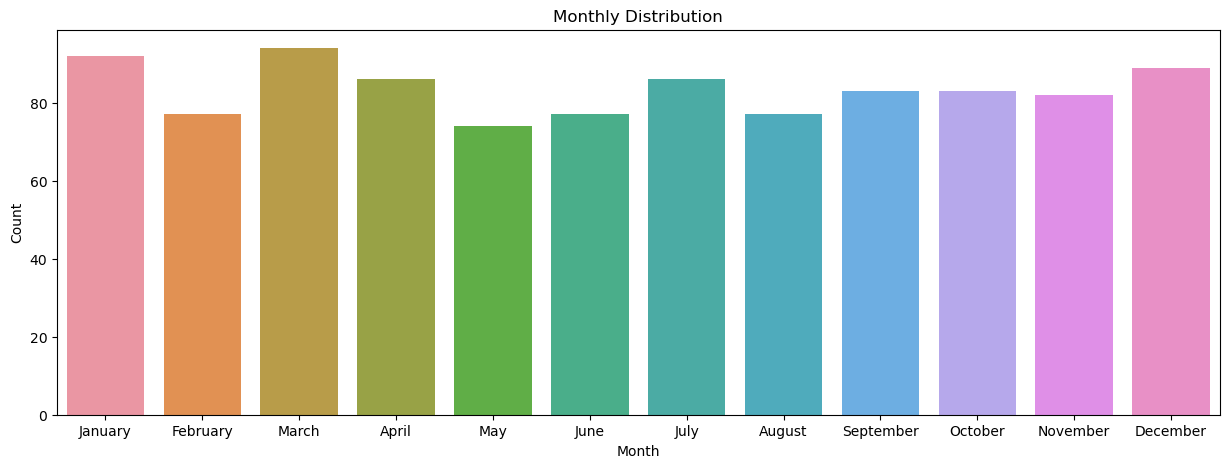

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(15,5))
plt.xlabel("Month") 
plt.ylabel("Count")
plt.title("Monthly Distribution")
sns.barplot(x = monthly_count.index,y = monthly_count.values)


Maximum shipment in March and minimum shipment in May

LOGISTICS DELAY REASON

In [195]:
delay_log = df.groupby('Logistics_delay_reason').size()
print(delay_log)
print("Main reason for logistics delay:",df['Logistics_delay_reason'].max())

Logistics_delay_reason
mechanical failure    234
none                  263
traffic               236
weather               267
dtype: int64
Main reason for logistics delay: weather


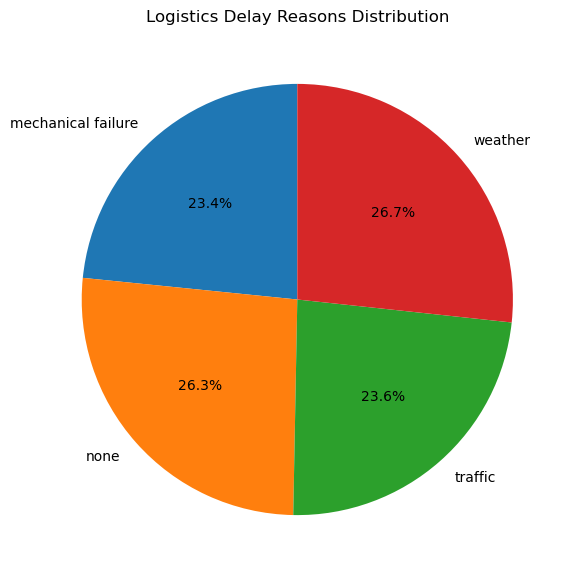

In [196]:
plt.figure(figsize=(7, 7))
delay_log.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.ylabel('') 
plt.title('Logistics Delay Reasons Distribution')
plt.show()


**LATITUDE AND LONGITUDE**

Coordinates having Traffic problem

In [197]:
traffic_Delay = df[df['Logistics_delay_reason']=='traffic']
traffic_locations = traffic_Delay.groupby(['Latitude','Longitude']).size().reset_index(name = 'Traffic_count')
traffic_locations = traffic_locations.sort_values(by = 'Traffic_count',ascending=False)
print(traffic_locations.head(10))


     Latitude  Longitude  Traffic_count
0      -86.94     -84.97              1
162     30.67      78.47              1
150     17.54     -68.53              1
151     17.71    -162.00              1
152     18.12     116.49              1
153     18.76     139.96              1
154     19.36    -149.45              1
155     19.56     171.87              1
156     24.20      18.69              1
157     24.84     -83.72              1


Coordinates having weather problem

In [198]:
weather = df[df['Logistics_delay_reason'] == 'weather']
weathtraff = weather.groupby(['Latitude','Longitude']).size().reset_index(name = 'weather_traff' )
weathtraff = weathtraff.sort_values(by = 'weather_traff',ascending=False)
print(weathtraff.head(10))

     Latitude  Longitude  weather_traff
0      -89.79      85.80              1
183     38.11     164.77              1
169     23.71     -92.91              1
170     23.96     -88.76              1
171     24.42      -7.06              1
172     25.70     150.63              1
173     26.38     157.09              1
174     27.27     -34.10              1
175     27.43      90.14              1
176     28.35      -1.55              1


Shipment_status
delayed       350
delivered     338
in transit    312
dtype: int64


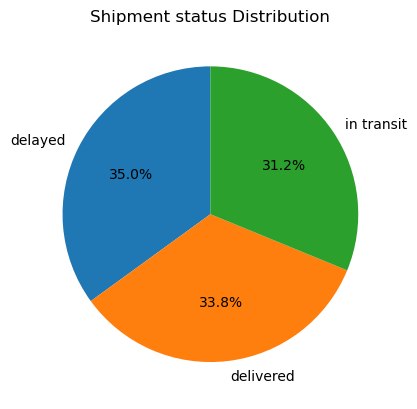

In [199]:
ship = df.groupby('Shipment_status').size()
print(ship)
ship.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.ylabel('') 
plt.title('Shipment status Distribution')
plt.show()

TEMPERATURE AFECTING SHIPMENT

In [200]:
temp_stats = df.groupby('Shipment_status').agg({
    'Temperature': ['mean', 'min', 'max', 'std']
})

print(temp_stats)

                Temperature                      
                       mean   min   max       std
Shipment_status                                  
delayed           23.676286  18.0  30.0  3.347194
delivered         23.988757  18.0  30.0  3.383928
in transit        24.035256  18.0  30.0  3.223164


In [201]:

temp_stats = df.groupby('Shipment_status').agg({
    'Temperature': ['mean', 'min', 'max']
}).reset_index()

print(temp_stats)


  Shipment_status Temperature            
                         mean   min   max
0         delayed   23.676286  18.0  30.0
1       delivered   23.988757  18.0  30.0
2      in transit   24.035256  18.0  30.0


C:\Users\aziya\AppData\Local\Temp\ipykernel_7864\2497472709.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Shipment_status', y='Temperature', data=df, estimator='mean', ci=None)


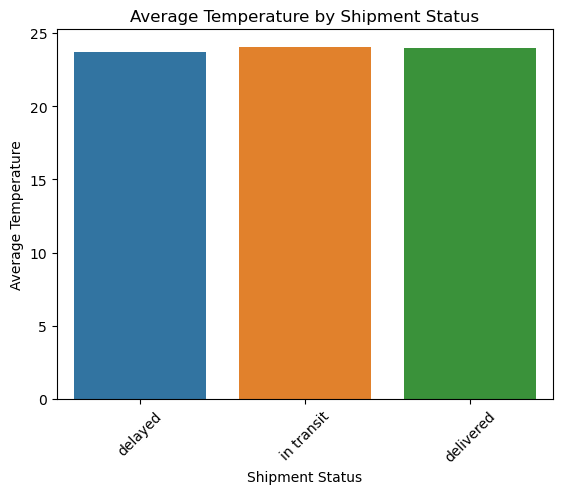

In [202]:
sns.barplot(x='Shipment_status', y='Temperature', data=df, estimator='mean', ci=None)
plt.title('Average Temperature by Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()



All shipment statuses share identical minimum (18°C) and maximum (30°C) temperatures with similar standard deviations (around 3.3°C), suggesting that any variations in shipment outcomes are likely due to other factors rather than temperature differences.

HUMIDITY AFFECTING SHIPMENT

In [203]:
humidity_Status = df.groupby('Shipment_status').agg({
    'Humidity':['mean','min','max','std']
})
print(humidity_Status)

                  Humidity                      
                      mean   min   max       std
Shipment_status                                 
delayed          64.438571  50.0  80.0  8.750258
delivered        65.649704  50.1  79.9  8.707966
in transit       65.061218  50.1  80.0  8.788922


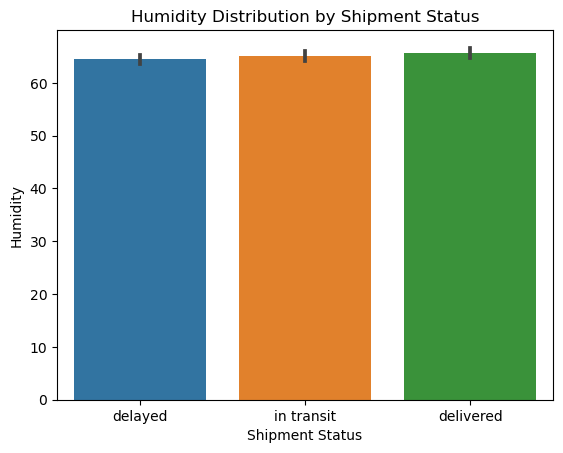

In [204]:
sns.barplot(x='Shipment_status', y='Humidity', data=df)
plt.title('Humidity Distribution by Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Humidity')
plt.show()

 Humidity levels are very similar across all shipment statuses, with only a slight increase in mean humidity for Delivered shipments (65.65%) compared to Delayed (64.44%). This suggests that humidity alone is not a strong predictor of shipment delays.

 Environmental factors like humidity and temperature are well-controlled and likely not significant contributors to shipping delays.

WAITING TIME IN SHIPPMENT STATUS

In [205]:
wait_time = df.groupby('Shipment_status').agg({
    'Waiting_time':['min','max','mean']
})
print(wait_time)

                Waiting_time               
                         min max       mean
Shipment_status                            
delayed                   10  60  34.560000
delivered                 10  60  35.281065
in transit                10  60  35.387821


Waiting times are nearly identical across all shipment statuses, with only a slight increase in mean waiting time for In Transit and Delivered shipments compared to Delayed shipments.

WAITING TIME IN TRAFFIC

In [206]:
traff = df.groupby('Traffic_status').agg({
    'Waiting_time':['min','max','mean']
})
print(traff)

               Waiting_time               
                        min max       mean
Traffic_status                            
clear                    10  60  35.542683
detour                   10  60  35.307246
heavy                    10  60  34.321101


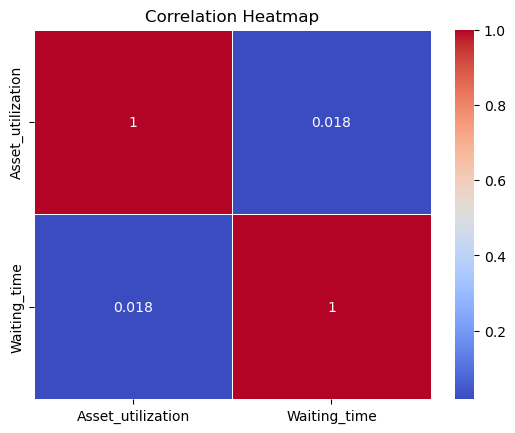

In [207]:
df_corr = df[['Asset_utilization', 'Waiting_time']].corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [208]:
correlation = df['Asset_utilization'].corr(df['Waiting_time'])
print(f"Correlation: {correlation}")

Correlation: 0.018008385002725117


Asset Utilization has almost no impact on Waiting Time.

USER PURCHASE FREQUENCY AND USER TRANSACTION AMOUNT 

In [209]:

purchase_counts = df['User_purchase_frequency'].value_counts()


max_count = purchase_counts.max()

max_frequencies = purchase_counts[purchase_counts == max_count]

print("Highest Purchase Frequency Count:", max_count)
print("Purchase Frequencies with this Count:", max_frequencies.index.tolist())


Highest Purchase Frequency Count: 110
Purchase Frequencies with this Count: [9, 2]


In [210]:
print(max(df['User_transaction_amount']))
print(min(df['User_transaction_amount']))

500
100


In [211]:
all_monthh = ['January','February','March','April','May','June','July','August','September','October','November','December']
purchase_month = df.groupby(df['Timestamp'].dt.month_name())['User_purchase_frequency'].mean().reindex(all_monthh,fill_value=0)
print("USER PURCHASE FREQUENCY IN EACH MONTH\n",purchase_month.round(2))

USER PURCHASE FREQUENCY IN EACH MONTH
 Timestamp
January      5.08
February     5.69
March        5.05
April        6.00
May          5.88
June         5.70
July         6.16
August       5.12
September    5.13
October      4.93
November     5.91
December     5.61
Name: User_purchase_frequency, dtype: float64


DEMAND FORECAST IN EACH MONTH 

In [212]:
all_months_dem = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avg_demand = df.groupby(df['Timestamp'].dt.month_name())['Demand_forecast'].mean().reindex(all_months_dem,fill_value=0)
print("DEMAND FORECAST IN EACH MONTH\n",monthly_avg_demand)

DEMAND FORECAST IN EACH MONTH
 Timestamp
January      206.956522
February     198.207792
March        203.180851
April        197.232558
May          185.405405
June         198.350649
July         197.709302
August       204.480519
September    201.337349
October      198.048193
November     202.634146
December     195.674157
Name: Demand_forecast, dtype: float64


In [213]:
max_month_dem = monthly_avg_demand.idxmax()
print("Maximum Demand forecast in",max_month_dem,"  ",monthly_avg_demand.max())

Maximum Demand forecast in January    206.95652173913044


In [214]:
min_month_dem = monthly_avg_demand.idxmin()
print("Minimum Demand forecast in",min_month_dem,"  ",monthly_avg_demand.min())

Minimum Demand forecast in May    185.40540540540542


<Axes: title={'center': 'Monthly Distribution'}, xlabel='Timestamp', ylabel='Average'>

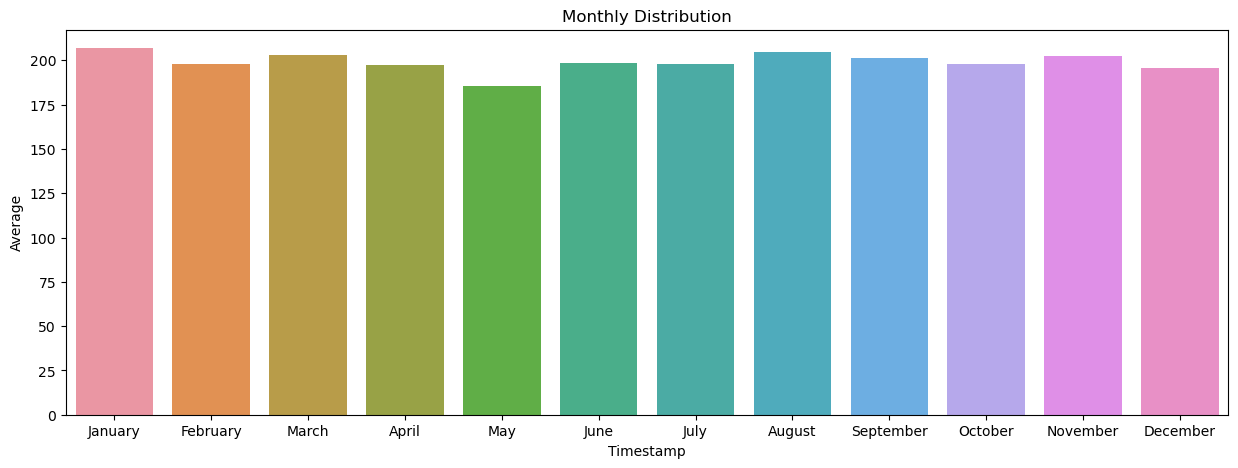

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(15,5))
plt.xlabel("Month")
plt.ylabel("Average")
plt.title("Monthly Distribution")
sns.barplot(x = monthly_avg_demand.index,y = monthly_avg_demand.values)


DEMAND FORECAST MINIMUM IN MAY AND MAXIMUM IN JANUARY

ASSET UTILIZATION

In [216]:
# Calculate correlation between Asset_Utilization and Demand_Forecast
correlation = df[['Asset_utilization', 'Demand_forecast']].corr()
print(correlation)

                   Asset_utilization  Demand_forecast
Asset_utilization           1.000000        -0.077926
Demand_forecast            -0.077926         1.000000


In [217]:
# Simple overall average
avg_utilization = df['Asset_utilization'].mean()
print(f"Overall Fleet Average Utilization: {avg_utilization:.2f}%")


Overall Fleet Average Utilization: 79.60%


In [218]:
all_months_asset = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avg_asset = df.groupby(df['Timestamp'].dt.month_name())['Asset_utilization'].mean().reindex(all_months_asset,fill_value=0)
print("AVERAGE ASSET UTILIZATION IN EACH MONTH\n",monthly_avg_asset)

AVERAGE ASSET UTILIZATION IN EACH MONTH
 Timestamp
January      80.893478
February     79.061039
March        78.251064
April        78.402326
May          79.491892
June         81.554545
July         80.182558
August       78.264935
September    80.785542
October      79.838554
November     77.973171
December     80.462921
Name: Asset_utilization, dtype: float64


In [219]:
max_month_asset_avg = monthly_avg_asset.idxmax()
print("Maximum asset_utilization in",max_month_asset_avg,"  ",monthly_avg_asset.max())

Maximum asset_utilization in June    81.55454545454545


In [220]:
min_month_asset_avg = monthly_avg_asset.idxmin()
print("Minimum asset_utilization in",min_month_asset_avg,"  ",monthly_avg_asset.min())

Minimum asset_utilization in November    77.97317073170731


<Axes: title={'center': 'Monthly Distribution'}, xlabel='Timestamp', ylabel='Asset_utilization'>

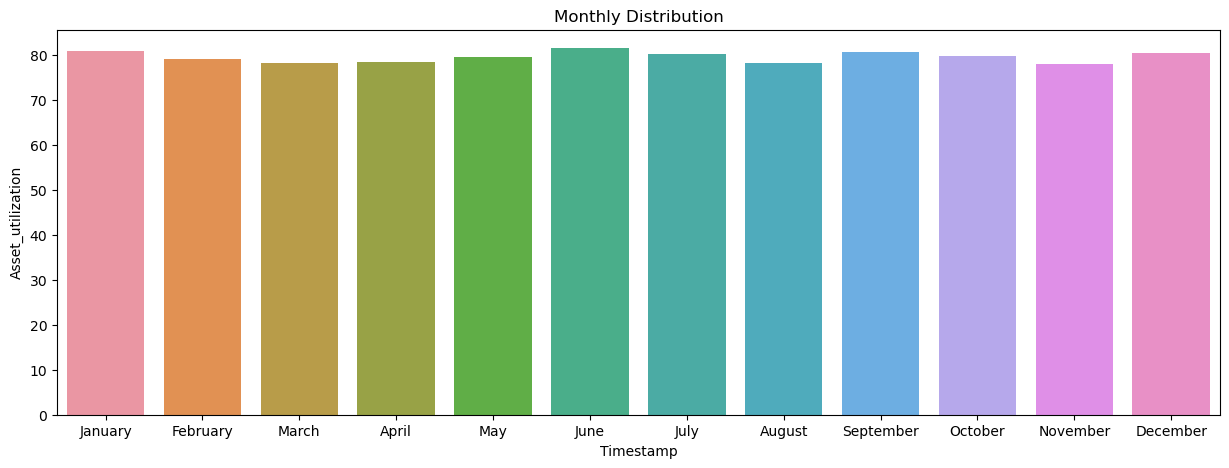

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(15,5))
plt.xlabel("Month")
plt.ylabel("Asset_utilization")
plt.title("Monthly Distribution")
sns.barplot(x = monthly_avg_asset.index,y = monthly_avg_asset.values)


Asset utilization is maximum in June and minimum in November

INVENTORY LEVEL 

In [222]:
all_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avg_inv = df.groupby(df['Timestamp'].dt.month_name())['Inventory_level'].mean().reindex(all_months,fill_value=0)
print("AVERAGE INVENTORY LEVEL IN EACH MONTH\n",monthly_avg_inv)

AVERAGE INVENTORY LEVEL IN EACH MONTH
 Timestamp
January      296.913043
February     297.792208
March        303.106383
April        314.302326
May          271.432432
June         313.389610
July         265.348837
August       290.051948
September    294.325301
October      318.927711
November     305.743902
December     301.179775
Name: Inventory_level, dtype: float64


Maximum inventory_level in October   318.9277108433735
Minimum inventory_level in July   265.3488372093023


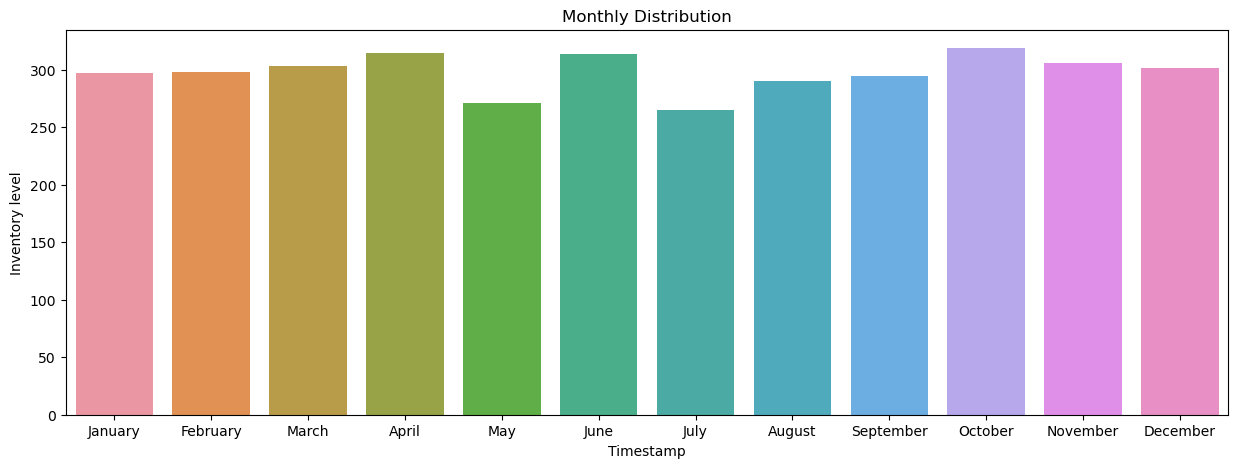

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(15,5))
plt.xlabel("Month")
plt.ylabel("Inventory level")
plt.title("Monthly Distribution")
sns.barplot(x = monthly_avg_inv.index,y = monthly_avg_inv.values)
max_month_asset_avg = monthly_avg_inv.idxmax()
print("Maximum inventory_level in",max_month_asset_avg," ",monthly_avg_inv.max())
min_month_asset_avg = monthly_avg_inv.idxmin()
print("Minimum inventory_level in",min_month_asset_avg," ",monthly_avg_inv.min())


TRAFFIC STATUS

In [224]:
delay_counts = df[df['Logistics_delay'] == 1]['Traffic_status'].value_counts()
print(delay_counts)

heavy     327
detour    124
clear     115
Name: Traffic_status, dtype: int64


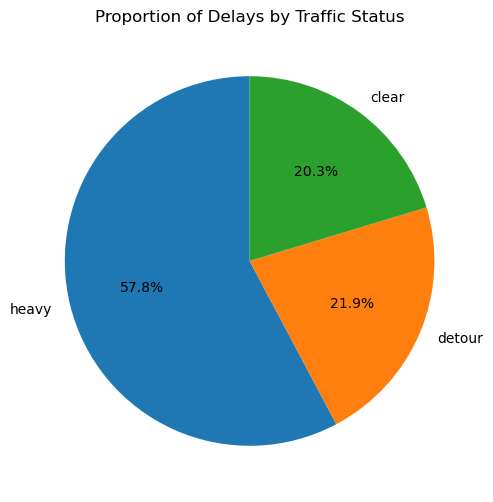

In [225]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 6))
delay_counts.plot(kind='pie',autopct='%1.1f%%' ,startangle=90)

plt.ylabel('')  # Hide y-label
plt.title("Proportion of Delays by Traffic Status")
plt.show()



Heavy traffic also leads to logistics delays, making it a priority area for optimization.

SHIPMENT STATUS AND ASSET UTILIZATION

In [226]:
asset_utilization_count = df.groupby("Shipment_status")["Asset_utilization"].count()
print(asset_utilization_count)


Shipment_status
delayed       350
delivered     338
in transit    312
Name: Asset_utilization, dtype: int64


The higher asset usage in **delayed shipments** (350) suggests inefficiencies or issues, while **delivered** (338) and **in-transit** (312) shipments show slightly lower engagement, indicating potential overuse or poor management in delays.

ASSET UTILIZATION IN DIFFERENT TRAFFIC STATUS

In [227]:
asset_utilization_by_traffic = df.groupby("Traffic_status")["Asset_utilization"].mean()

print(asset_utilization_by_traffic)

Traffic_status
clear     79.249085
detour    79.432464
heavy     80.125994
Name: Asset_utilization, dtype: float64


Despite varying traffic conditions, assets are being utilized similarly across the conditions. Even in Heavy Traffic, assets seem to be put to good use.

ASSET USAGE COUNT

In [228]:
asset_usage_count = df.groupby('Asset_id').size()
print(asset_usage_count)
asset_usage_count.max()

Asset_id
truck_1      89
truck_10    105
truck_2     105
truck_3      93
truck_4     107
truck_5      93
truck_6     103
truck_7     102
truck_8     109
truck_9      94
dtype: int64


109

In [229]:
max_used_asset = asset_usage_count.idxmax()

max_usage_count = asset_usage_count.max()

print(f"The maximum used truck (Asset_ID) is: {max_used_asset}")
print(f"It has been used {max_usage_count} times.")

The maximum used truck (Asset_ID) is: truck_8
It has been used 109 times.


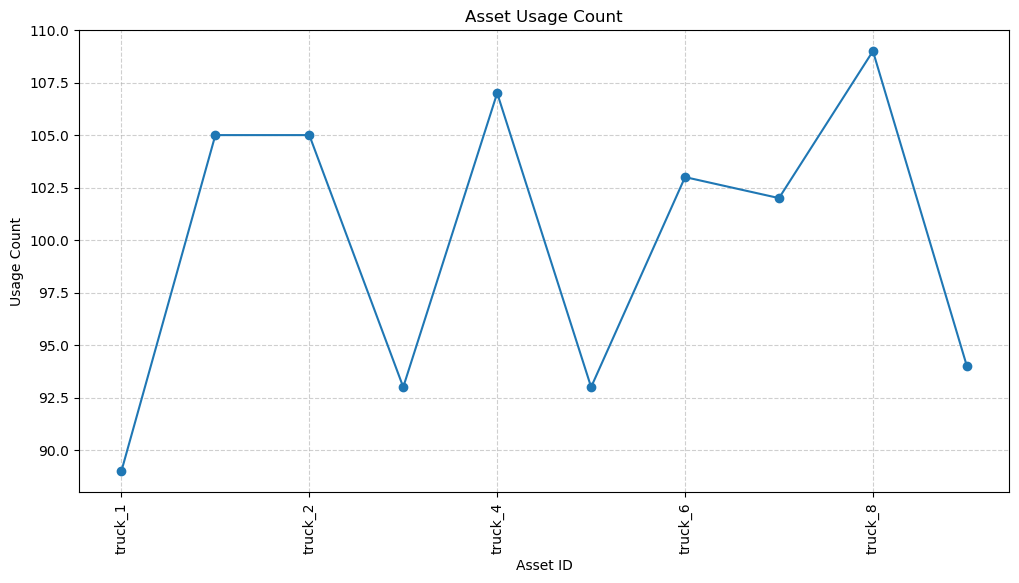

In [230]:
plt.figure(figsize=(12, 6))
asset_usage_count.plot(kind='line', marker='o', linestyle='-')

plt.xlabel('Asset ID')
plt.ylabel('Usage Count')
plt.title('Asset Usage Count')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## INSIGHT:


1. **Asset Utilization** is highest in **delayed shipments** (350), indicating inefficiencies in handling delays. **Truck_8**, the most used asset (109 times), may be a key contributor to these inefficiencies, highlighting potential overuse or under-maintenance of critical assets.

2. **Temperature and Humidity** have minimal impact on delays, as values remain consistent across shipment statuses, suggesting that environmental factors are not major contributors.

3. **Waiting Times** show only minor variation across shipment statuses, indicating that delays are likely influenced more by traffic and asset management.

4. **Heavy Traffic** is the primary cause of delays, with consistent waiting times across traffic conditions, emphasizing the need for traffic optimization.

5. **Asset Utilization** peaks in **June** (maximum) and drops in **November** (minimum), highlighting potential inefficiencies in certain months.

6. **Inventory Levels** are highest in **October** and lowest in **July**, suggesting seasonal fluctuations in inventory management that may affect supply chain performance.

7. **User Purchase Frequency** and **Transaction Amounts** vary, with peak transactions reaching 500, showing demand fluctuations that could impact logistics planning.

8. **Demand Forecast** is highest in **January** and lowest in **May**, suggesting seasonal impacts on logistics planning.


## SUGGESTIONS:

1. Conduct regular maintenance and rotate usage of high-utilization assets like **Truck_8** to prevent overuse and breakdowns.  

2. Use real-time traffic data and route optimization tools to minimize delays caused by heavy traffic.  

3. Adjust asset allocation and hire temporary resources during peak months like June to balance utilization.  

4. Align inventory with demand forecasts to avoid overstocking in October and stockouts in July.  

5. Use advanced forecasting tools to plan for high demand in January and low demand in May.    

6. Use IoT sensors to monitor temperature and humidity for sensitive shipments, even though their impact on delays is minimal.  

7. Streamline loading/unloading processes and use automated scheduling tools to minimize idle time.  

8. Invest in AI, machine learning, and warehouse automation to improve efficiency and reduce manual errors.